# Employee Salary Prediction Dataset
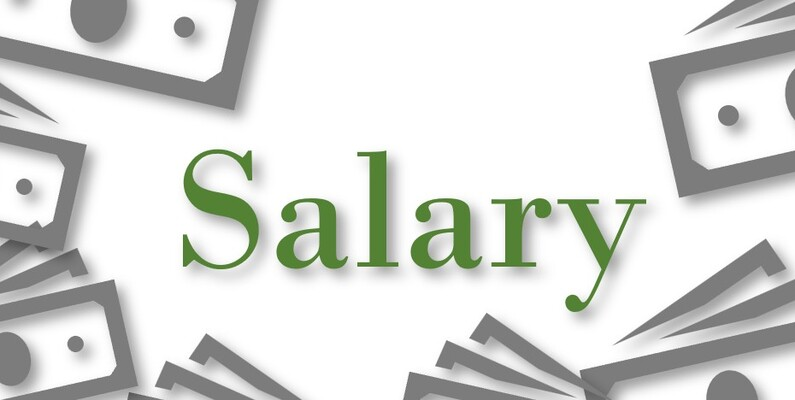

###**Source:** https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer
###**Objective:** Understand salary determinants based on experience and qualifications.

## Dataset Overview
This dataset contains salary information along with demographic and professional details of employees. It includes the following features:

### **Columns Description:**
1. **Age** (Numeric) - Age of the employee.
2. **Gender** (Categorical) - Male/Female.
3. **Education Level** (Categorical) - Degree level (Bachelor’s, Master’s, PhD, etc.).
4. **Job Title** (Categorical) - Employee's job position.
5. **Years of Experience** (Numeric) - Total work experience in years.
6. **Salary** (Numeric) - Employee's annual salary.




In [ ]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading the dataset
data = pd.read_csv("/content/Salary Data.csv")

In [ ]:
#printing the dataset
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
##finding the datatypes,colums and rows /information of the data provided or summaryzing the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


From the info we can see
1. The data has 375 rows and 6 columns
2. There are few null values and has colomn with categorial data




In [ ]:
#Print the duplicated rows
data[data.duplicated()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [ ]:
# Number of duplicated rows
print(data.duplicated().sum())

50


In [ ]:
#Droping duplicate rows
data.drop_duplicates(inplace=True)

Droping the duplicate colomns to increase the effeciency of the data

In [ ]:
# Number of duplicated rows
print(data.duplicated().sum())

0


In [ ]:
#Finding the unique values in colomn
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
#Finding the counts of each value in colomn
data['Job Title'].value_counts()

,count
Job Title,
Director of Operations,9
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Business Analyst,6
...,...
Business Development Manager,1
Customer Service Representative,1
IT Manager,1


In [ ]:
#Finding the counts of each value in colomn
data['Years of Experience'].value_counts()

,count
Years of Experience,
3.0,27
2.0,26
9.0,19
8.0,17
5.0,16
7.0,16
4.0,16
10.0,16
16.0,15


In [ ]:
#Finding all unique values in colomn
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan], dtype=object)

In [ ]:
#Finding the no.of null values in data
data.isnull().sum()

,0
Age,1
Gender,1
Education Level,1
Job Title,1
Years of Experience,1
Salary,1


In [ ]:
#Finding the datatypes of all colomns
data.dtypes

,0
Age,float64
Gender,object
Education Level,object
Job Title,object
Years of Experience,float64
Salary,float64


In [ ]:
# Fill 'Gender' with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Fill 'Education Level' with the mode
data['Education Level'].fillna(data['Education Level'].mode()[0], inplace=True)

# Fill 'Job Title' with the mode
data['Job Title'].fillna(data['Job Title'].mode()[0], inplace=True)

So for categorial  data filling the null values with mode

In [ ]:
#Finding the no.of null values in data
data.isnull().sum()

,0
Age,1
Gender,0
Education Level,0
Job Title,0
Years of Experience,1
Salary,1


In [ ]:
#Describing the data /finding the mean,Standard deviation ,count, median for columns
data.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


1. From describing data we can numerical coloumns has some diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present
2. So plotting histogram and boxplot for numerical colomns for futher analysis


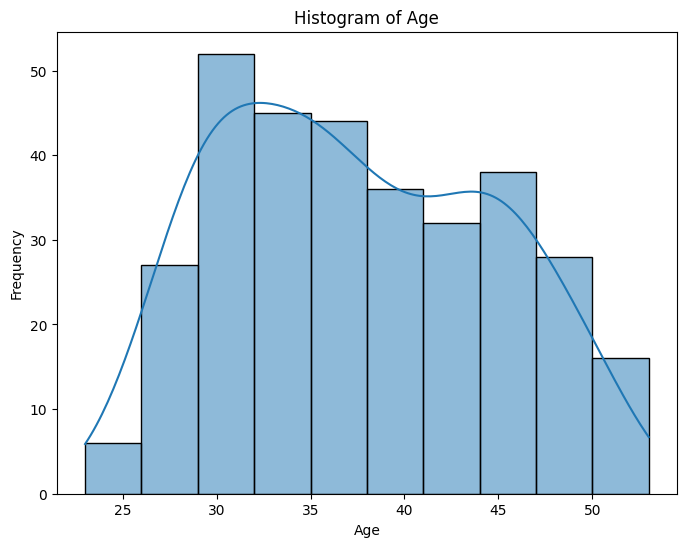

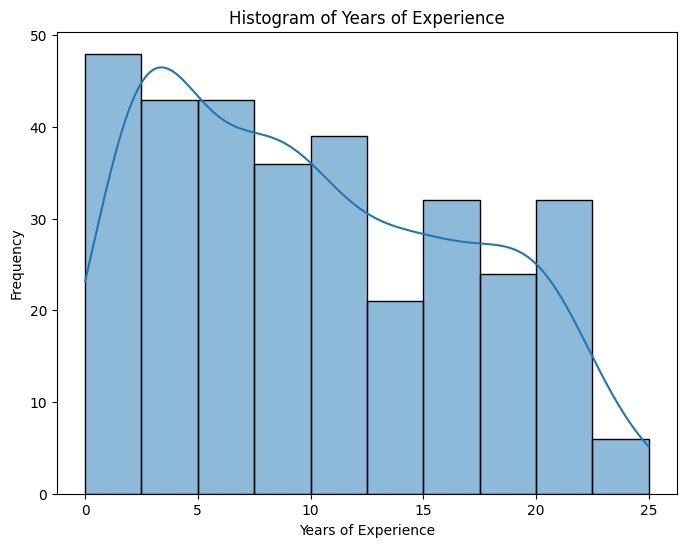

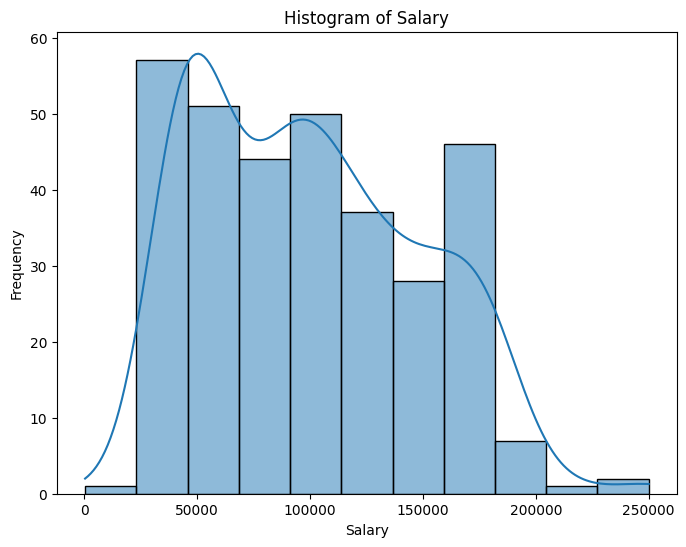

In [ ]:
#Histogram for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From histogram
1. Age: Ranges from 23 to 53 years, with an average of ~37 years.Slightly right-skewed, with most employees in their 30s and 40s.
2. Years of Experience: Varies from 0 to 25 years, with a median of 9 years.Right-skewed, with many employees having less than 10 years of experience.
3. Salary: Wide range from 350 to 250,000, with a median salary of 95,000.The minimum salary of 350 seems like a potential outlier.Highly skewed with a few very high salaries, indicating possible outliers.

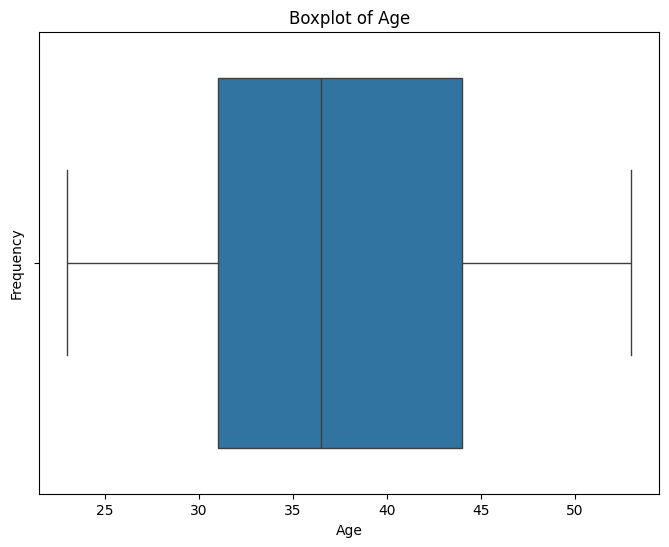

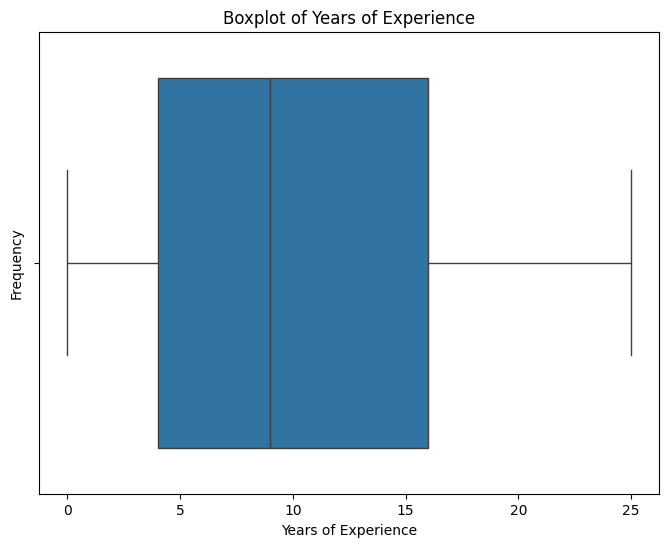

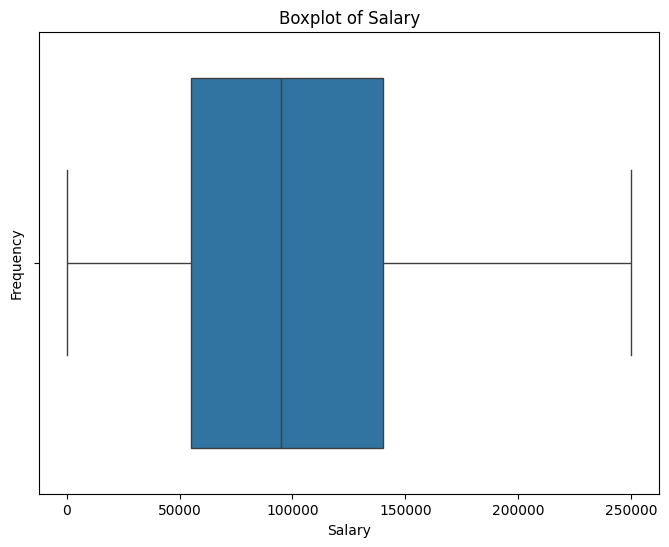

In [ ]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot
1. We can observe there are no outliers in salary, age, and experience


In [ ]:
# Fill numerical columns' NaN values with the mean
for col in data.select_dtypes(include=np.number):
    data[col].fillna(data[col].mean(), inplace=True)

In [ ]:
#finding null values
data.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


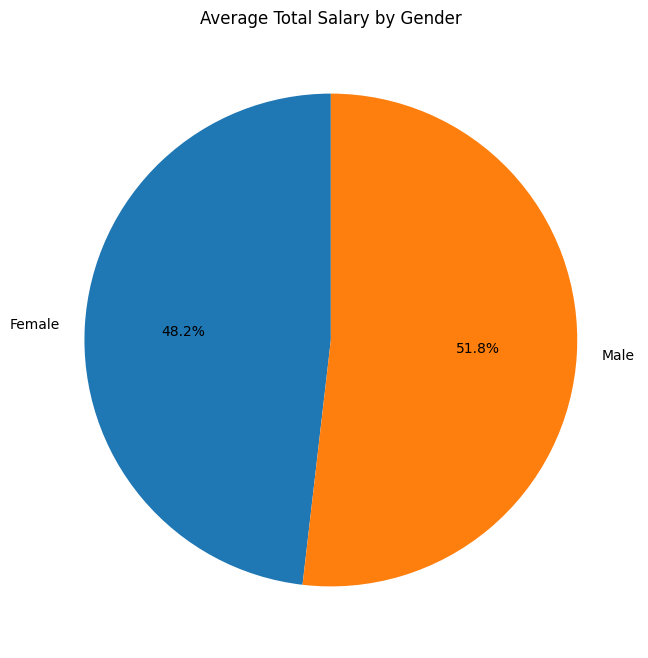

In [ ]:
#piechart totalscore and gender
# Calculate the average total score for each gender
average_salarys_by_gender = data.groupby('Gender')['Salary'].mean()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_salarys_by_gender, labels=average_salarys_by_gender.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Total Salary by Gender')
plt.show()

Sarlies of male(51.8%) is more compared to femmale employees 48.2%

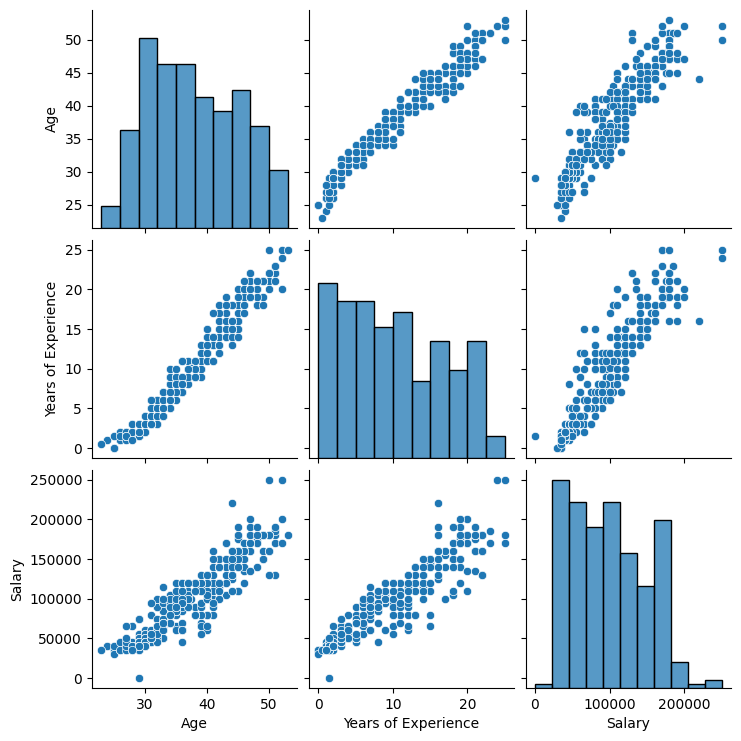

In [ ]:
# Create the pairplot
sns.pairplot(data)
plt.show()

From the pairplot Years of experience and age shows an upward linear trend with salary which means these factors might be dependent on each other and as age and years of experience increases salary also increases

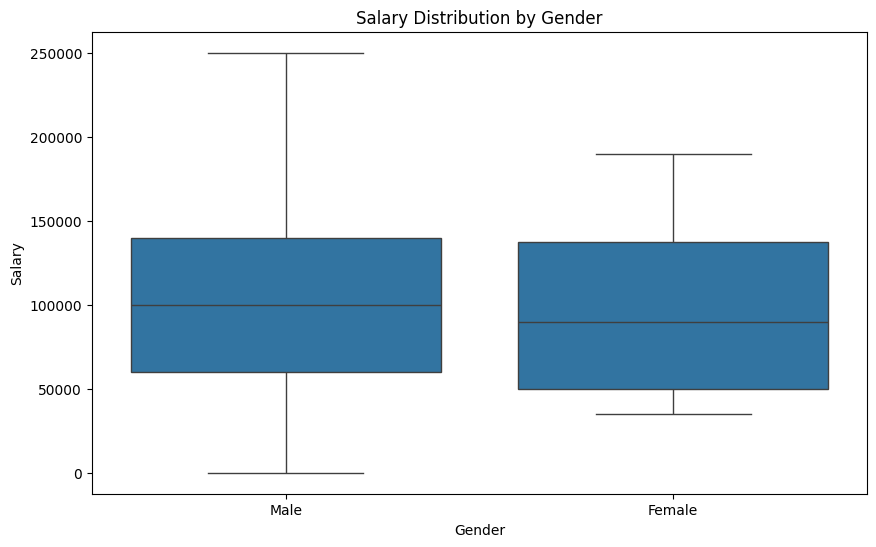

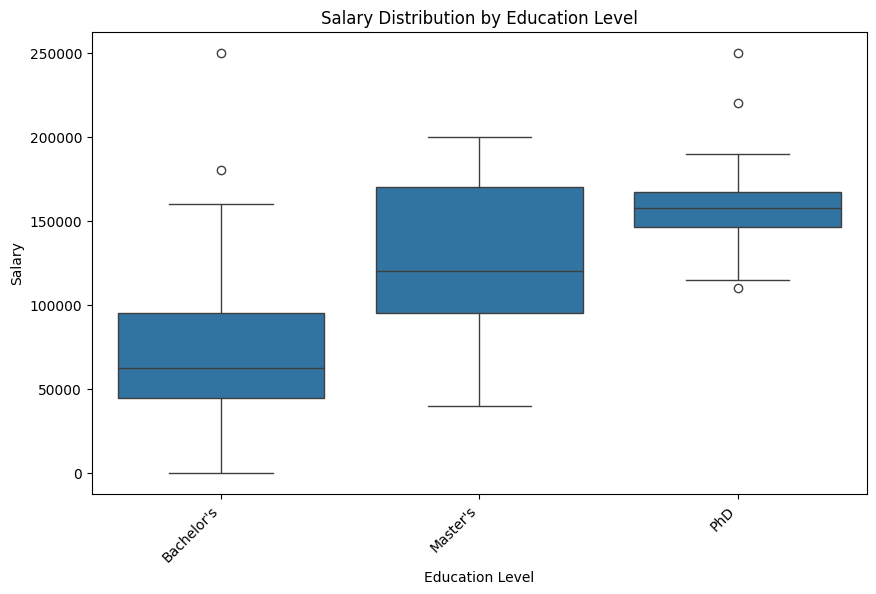

In [ ]:
# Create the boxplot for categorial coloumns vs salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=data)
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()



1. Median salaries are similar for both genders.
Males have a wider salary range with higher outliers.
Females’ salaries are more concentrated.
Males show higher maximum salaries.

2. Higher education levels (Master’s, PhD) generally lead to higher salaries.
Bachelor’s degree has the lowest median salary with a wider spread.
Master’s degree shows a significant increase in salary range compared to Bachelor’s.
PhD holders have the highest median salary with less variation, indicating more stable compensation.
Outliers exist at all levels, especially for Bachelor's, suggesting some exceptionally high earners.

In [ ]:
"""# Sample dataset
data = pd.DataFrame({
    'Job Title': ['Data Scientist', 'Manager', 'Analyst', 'Engineer', 'Manager', 'Director'],
    'Salary': [100000, 90000, 70000, 80000, 95000, 150000]  # Example salaries
})

# Compute median salary for each job title
job_title_salary_map = data.groupby("Job Title")["Salary"].median().rank()

# Map rank-based encoding back to the dataset
data["Job Title Encoded"] = data["Job Title"].map(job_title_salary_map)

# Display the updated DataFrame
print(data)"""


'# Sample dataset\ndata = pd.DataFrame({\n    \'Job Title\': [\'Data Scientist\', \'Manager\', \'Analyst\', \'Engineer\', \'Manager\', \'Director\'],\n    \'Salary\': [100000, 90000, 70000, 80000, 95000, 150000]  # Example salaries\n})\n\n# Compute median salary for each job title\njob_title_salary_map = data.groupby("Job Title")["Salary"].median().rank()\n\n# Map rank-based encoding back to the dataset\ndata["Job Title Encoded"] = data["Job Title"].map(job_title_salary_map)\n\n# Display the updated DataFrame\nprint(data)'

In [ ]:
#Finding all unique values in colomn
data['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [ ]:
# Calculate value counts for 'Job Title'
job_title_counts = data['Job Title'].value_counts()

# Set a threshold for "other" category (e.g., keep top 5 job titles)
threshold = 5

# Create a list of job titles to keep
top_job_titles = job_title_counts[job_title_counts >= threshold].index.tolist()

# Replace job titles below the threshold with "Other"
data['Job Title'] = data['Job Title'].apply(lambda x: x if x in top_job_titles else 'Other')

In [ ]:
data['Job Title'].value_counts()

,count
Job Title,
Other,253
Director of Operations,10
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Data Scientist,6
Senior Financial Analyst,6
Senior Business Analyst,6
Junior Financial Analyst,6


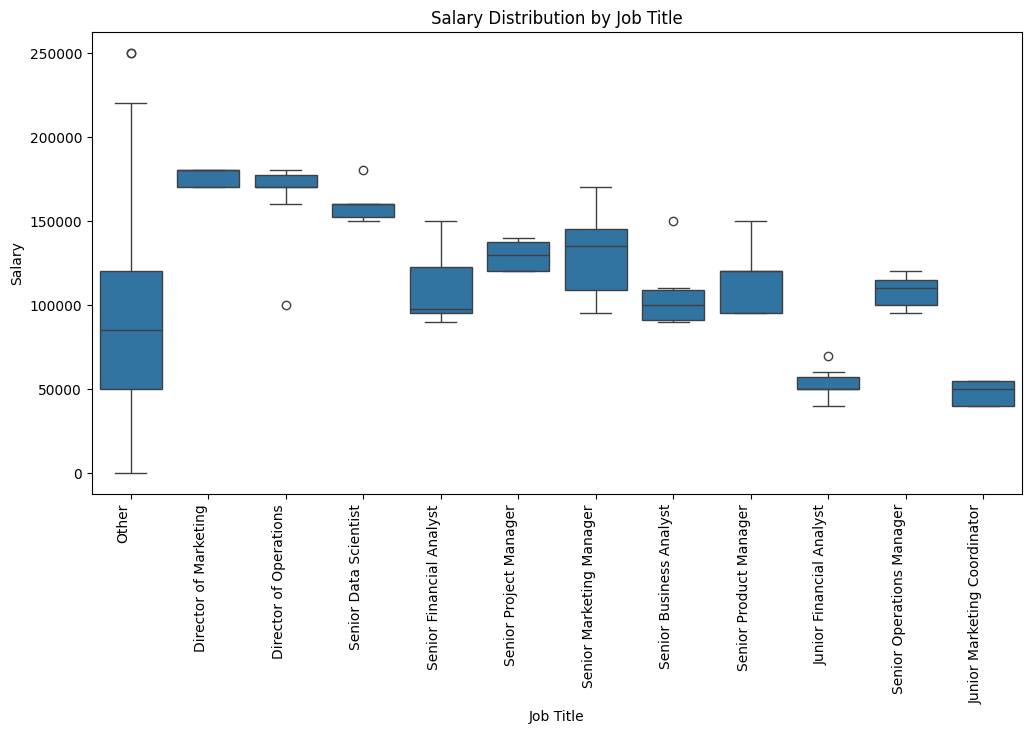

In [ ]:
# Adjust figure size for better visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Title', y='Salary', data=data)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for better readability
plt.show()

1. Higher positions (Directors, Senior Data Scientists) have higher median salaries and less variation.
2. Junior roles have lower salaries with less spread.
3. Some roles (e.g., Senior Project Manager) show outliers, indicating pay disparities.
4. Tightly clustered salaries (e.g., Directors) suggest standardized pay, while wider ranges (e.g., Analysts) indicate variability.
5. "Other" category has extreme outliers, suggesting mixed job roles.

In [ ]:
# Encoding Categorical Variables (0 and 1) using One-Hot Encoding
categorical_columns = [ 'Gender', 'Education Level','Job Title']

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)  # Keep all categories

# Convert True/False values to 0 and 1 explicitly
data = data.astype(int)

# Display cleaned dataset
print(data.head())


   Age  Years of Experience  Salary  Gender_Male  Education Level_Master's  \
0   32                    5   90000            1                         0   
1   28                    3   65000            0                         1   
2   45                   15  150000            1                         0   
3   36                    7   60000            0                         0   
4   52                   20  200000            1                         1   

   Education Level_PhD  Job Title_Director of Operations  \
0                    0                                 0   
1                    0                                 0   
2                    1                                 0   
3                    0                                 0   
4                    0                                 0   

   Job Title_Junior Financial Analyst  Job Title_Junior Marketing Coordinator  \
0                                   0                                       0   
1       

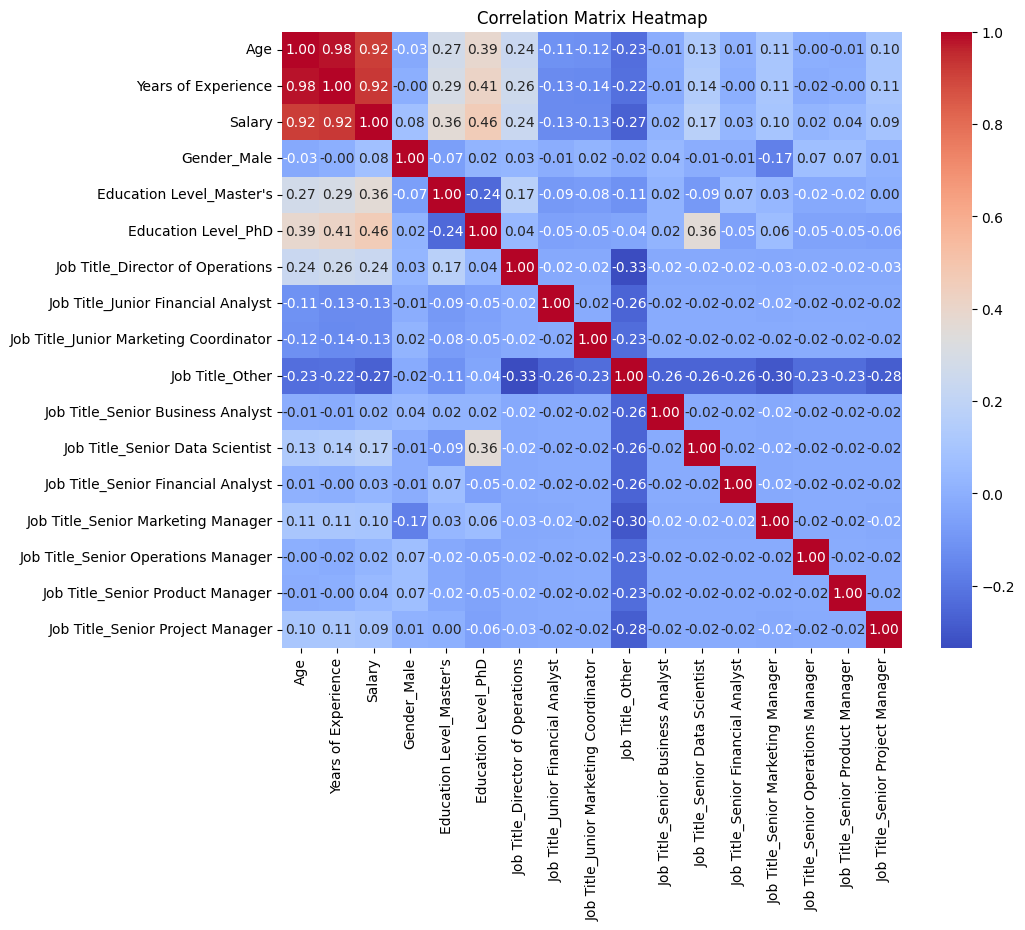

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

From the heatmap
1. Salary has a high positive correlation with years of experience (0.92) and age (0.92), indicating that as employees gain experience and grow older, their salaries tend to increase.
2. Salary also has a moderate positive correlation with education level—Masters (0.36) and PhD (0.46), suggesting that higher education leads to better earnings.
3. Years of experience and age are highly correlated (0.98), confirming that older employees generally have more experience.
4. Job title “Senior Data Scientist” shows a moderate correlation with salary (0.17), meaning higher-ranking positions generally earn more.
5. Gender has a weak correlation with salary (0.08), indicating minimal direct impact, but male employees have slightly higher earnings on average.

In [ ]:
# printing the data values in an array
data.values


array([[    32,      5,  90000, ...,      0,      0,      0],
       [    28,      3,  65000, ...,      0,      0,      0],
       [    45,     15, 150000, ...,      0,      0,      0],
       ...,
       [    44,     16, 160000, ...,      0,      0,      0],
       [    31,      3,  55000, ...,      0,      0,      0],
       [    43,     19, 170000, ...,      0,      0,      0]])

In [ ]:
#Scaling the data
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.3  0.2  0.36 1.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.17 0.12 0.26 0.   1.   0.   0.   0.   0.   1.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.73 0.6  0.6  1.   0.   1.   0.   0.   0.   1.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.43 0.28 0.24 0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.97 0.8  0.8  1.   1.   0.   0.   0.   0.   1.   0.   0.   0.   0.
  0.   0.   0.  ]]


In [ ]:
# Standardize data (0 mean, 1 stdev)
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.75 -0.76 -0.21  0.95 -0.62 -0.39 -0.18 -0.14 -0.13  0.53 -0.14 -0.14
  -0.14 -0.16 -0.12 -0.12 -0.15]
 [-1.31 -1.06 -0.72 -1.05  1.6  -0.39 -0.18 -0.14 -0.13  0.53 -0.14 -0.14
  -0.14 -0.16 -0.12 -0.12 -0.15]
 [ 1.06  0.75  1.03  0.95 -0.62  2.6  -0.18 -0.14 -0.13  0.53 -0.14 -0.14
  -0.14 -0.16 -0.12 -0.12 -0.15]
 [-0.19 -0.46 -0.82 -1.05 -0.62 -0.39 -0.18 -0.14 -0.13  0.53 -0.14 -0.14
  -0.14 -0.16 -0.12 -0.12 -0.15]
 [ 2.04  1.5   2.06  0.95  1.6  -0.39 -0.18 -0.14 -0.13  0.53 -0.14 -0.14
  -0.14 -0.16 -0.12 -0.12 -0.15]]


So to conclude Salary increases 🚀 with experience and age.
Higher education (Master’s, PhD) leads to better earnings 💰.
Senior job titles are linked to higher salaries.
Gender has minimal impact on salary.
\
Experience, education, and job title are key salary determinants 💵 .